In [ ]:
!pip install tensorflow flask numpy pillow scikit-learn matplotlib

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [ ]:
import zipfile
import os

with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

In [ ]:
train_dir = '/content/dataset'

In [ ]:
# Set up ImageDataGenerator for real-time data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=40,  # Random rotations
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Random shear transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest'  # How to fill in newly created pixels
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='binary'  # Since it's a binary classification (real vs fake)
)

Found 1008 images belonging to 1 classes.


In [ ]:
from tensorflow.keras import layers, models

In [ ]:
# Import necessary libraries
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # First convolutional layer
    layers.MaxPooling2D((2, 2)),  # MaxPooling layer

    layers.Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    layers.MaxPooling2D((2, 2)),  # MaxPooling layer

    layers.Conv2D(128, (3, 3), activation='relu'),  # Third convolutional layer
    layers.MaxPooling2D((2, 2)),  # MaxPooling layer

    layers.Flatten(),  # Flatten the 3D matrix to 1D vector
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss='binary_crossentropy',  # Binary classification problem
    optimizer='adam',  # Adam optimizer is a good choice for CNN
    metrics=['accuracy']
)

In [ ]:
import os
print(os.path.isdir(train_dir))  # Should return True
print(os.listdir(train_dir))  # Should list 'real' and 'fake' directories

True
['dataset']


In [ ]:
# Check if images are being loaded
print(train_generator.samples)  # This should return the number of images in the dataset

1008


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust based on your requirement
    validation_data=train_generator,
    validation_steps=train_generator.samples // train_generator.batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 178s 6s/step - accuracy: 0.8811 - loss: 0.0912 - val_accuracy: 1.0000 - val_loss: 8.0681e-20
Epoch 2/10
 1/31 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31/31 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.3495e-19
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 204s 7s/step - accuracy: 1.0000 - loss: 1.5102e-20 - val_accuracy: 1.0000 - val_loss: 1.4600e-21
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 2.3789e-20
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 245s 6s/step - accuracy: 1.0000 - loss: 5.3645e-21 - val_accuracy: 1.0000 - val_loss: 2.4409e-22
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.6228e-20
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 202s 6s/step - accuracy: 1.0000 - loss: 6.2798e-22 - val_accuracy: 1.0000 - val_loss: 3.1136e-21
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 2.5451e-20
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 164s 5s/step - accuracy: 1.0000 

In [ ]:
# Save the trained model
model.save('cnn_model.h5')

deepfake detection prediction

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
# Load the trained model
model = load_model('/content/cnn_model.h5')

load the pre trained model

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory('/content/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory('/content/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 807 images belonging to 1 classes.
Found 201 images belonging to 1 classes.


data preparation

In [ ]:
# Define image data generators for train and validation sets
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory('/content/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory('/content/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 807 images belonging to 1 classes.
Found 201 images belonging to 1 classes.


model training

In [ ]:
# Model definition (using ResNet50 as an example)
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base.output)
x = Dropout(0.3)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base.input, outputs=x)

for layer in base.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Save the trained model
model.save('/content/cnn_model.h5')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 190s 7s/step - accuracy: 0.1000 - loss: 1.1880 - val_accuracy: 0.0000e+00 - val_loss: 0.8974
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 183s 7s/step - accuracy: 0.3318 - loss: 0.8864 - val_accuracy: 0.9602 - val_loss: 0.6131
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 178s 7s/step - accuracy: 0.6651 - loss: 0.6162 - val_accuracy: 1.0000 - val_loss: 0.4240
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 180s 7s/step - accuracy: 0.9088 - loss: 0.4135 - val_accuracy: 1.0000 - val_loss: 0.3061
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 178s 7s/step - accuracy: 0.9654 - loss: 0.3139 - val_accuracy: 1.0000 - val_loss: 0.2282
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 187s 7s/step - accuracy: 0.9862 - loss: 0.2409 - val_accuracy: 1.0000 - val_loss: 0.1759
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 179s 7s/step - accuracy: 1.0000 - loss: 0.1893 - val_accuracy: 1.0000 - val_loss: 0.1397
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 202s 7s/step - acc

plot accuracy and loss

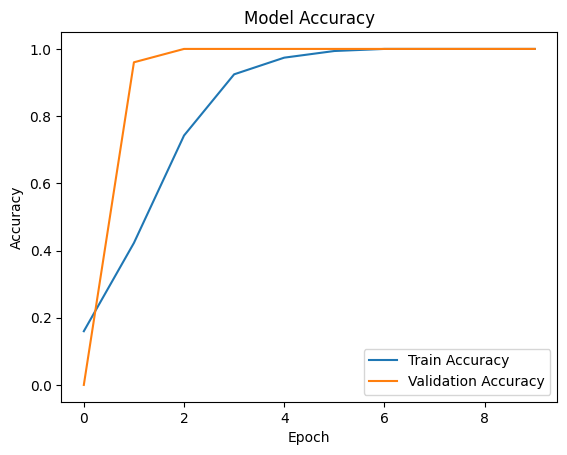

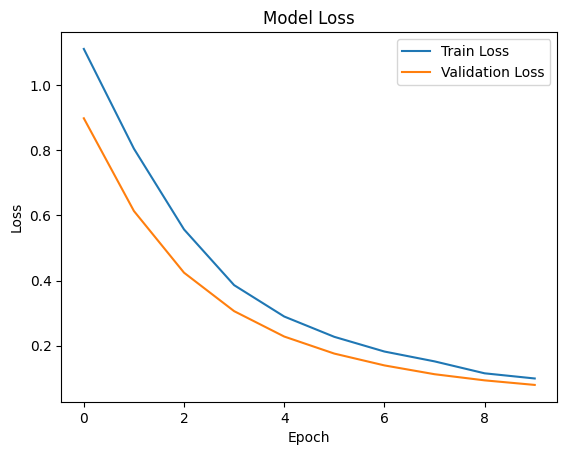

In [ ]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 43s 6s/step
Accuracy on Validation Set: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


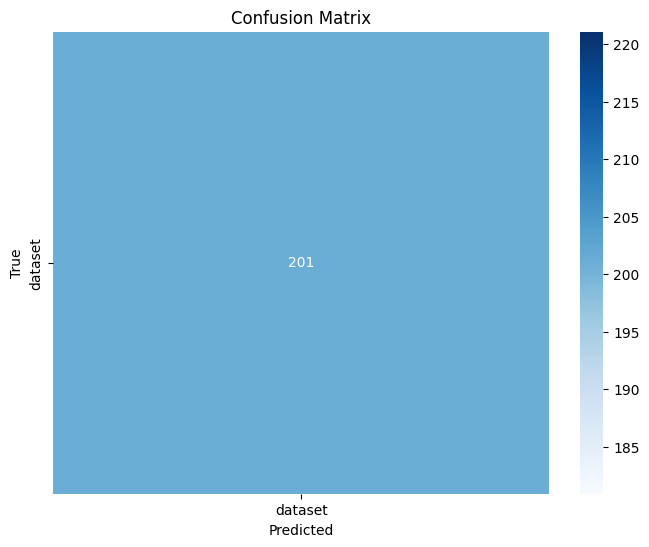

In [ ]:
# Generate predictions for the validation set
val_preds = model.predict(val_data)

# Convert predictions to binary (0 or 1)
val_preds_binary = (val_preds > 0.5).astype(int)

# Get true labels
true_labels = val_data.classes

# Calculate accuracy score
accuracy = accuracy_score(true_labels, val_preds_binary)
print(f"Accuracy on Validation Set: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(true_labels, val_preds_binary)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices, yticklabels=val_data.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

predicting is it a deepfake of a single image

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


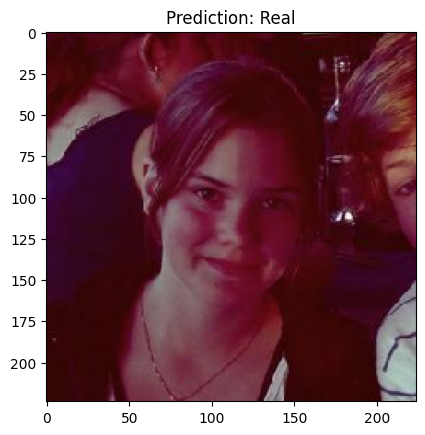

In [ ]:
def predict_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the image class
    pred = model.predict(img_array)[0][0]
    label = "Fake" if pred > 0.5 else "Real"

    # Display the image and result
    plt.imshow(img)
    plt.title(f"Prediction: {label}")
    plt.show()

# Example: Predict a sample image
predict_image('/content/real_0.jpg')